# Mục lục
* [Giới thiệu](#gioithieu)
* [Tiền xử lý](#tienxuly)
* [Phân tích](#phantich)
    * [Bước 1: Tìm hiểu số lượng sách có mặt ở Tiki của top 10 thể loại phổ biến nhất.](#buoc1)
    * [Bước 2: Tìm hiểu doanh thu của các thể loại.](#buoc2)
    * [Bước 3: Tìm hiểu về mối liên hệ giữa mức giảm giá với số lượng bán ra của từng thể loại.](#buoc3)
    * [Bước 4: Tìm hiểu về mối liên hệ giữa giá hiện tại với số lượng bán ra của từng thể loại.](#buoc4)
    * [Bước 5: Tìm hiểu về mối liên hệ giữa điểm đánh giá, lượt đánh giá với số lượng bán ra của từng thể loại.](#buoc5)
* [Kết luận](#ketluan)

## Giới thiệu: <a class="anchor" id="gioithieu"></a>
**Câu hỏi**: Tiki nên có chiến lược kinh doanh như thế nào đối với việc lựa chọn thể loại sách?

**Lợi ích**: 
- Có cái nhìn tổng quát về thị trường các thể loại sách và hình thành chiến lược kinh doanh như có cách chiến dịch ưu đãi và khuyến mãi, nhập những thể loại được độc giả ưa chuộng,...
- Tăng doanh thu nhờ có chiến lược hiệu quả.
- Gia tăng lòng tin của khách hàng đối với Tiki: Cung cấp các đầu sách đúng với sở thích, giúp tạo trải nghiệm mua sắm cá nhân hóa, khiến khách hàng quay lại.
- Hạn chế tồn kho đối với các đầu sách không phổ biến nhờ việc lựa chọn danh mục dựa trên dữ liệu phân tích.
- Nâng cao hình ảnh thương hiệu và tăng khả năng cạnh tranh trên thị trường.

**Cách thực hiện**:
- Xem xét các thể loại phổ biến dựa trên số lượng tựa sách có mặt ở Tiki.
- Tìm hiểu doanh thu của các thể loại.
- Tìm hiểu về mối liên hệ giữa mức giảm giá với số lượng bán ra của từng thể loại.
- Tìm hiểu về mối liên hệ giữa giá hiện tại với số lượng bán ra của từng thể loại.
- Tìm hiểu về mối liên hệ giữa điểm đánh giá, lượt đánh giá với số lượng bán ra của từng thể loại.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../dataset/book_data_cleaned.csv")
df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
1,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới
2,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn
3,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội
4,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Không rõ,135000,81000,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn


## Tiền xử lý <a class="anchor" id="tienxuly"></a>

In [3]:
# Đếm số lượng thể loại sách (unique categories)
num_categories = df['category'].nunique()
print(f"Số lượng thể loại sách ở Tiki: {num_categories}")

Số lượng thể loại sách ở Tiki: 75


In [4]:
# Tính mức giảm giá (%)
df['discount'] = ((df['original_price'] - df['current_price']) / df['original_price']) * 100

# Nhóm dữ liệu theo thể loại và tính toán các thông số thống kê
category_stats = df.groupby('category').agg(
    total_books=('title', 'count'),  # Đếm số tựa sách
    avg_current_price=('current_price', 'mean'),  # Giá hiện tại trung bình
    total_quantity=('quantity', 'sum'),  # Tổng số lượng sách bán ra
    avg_rating=('avg_rating', 'mean'),  # Điểm đánh giá trung bình
    total_reviews=('n_review', 'sum'),  # Tổng số lượt đánh giá
    avg_discount=('discount', 'mean')  # Mức giảm giá trung bình
).sort_values(by='total_books', ascending=False)

# Lấy top 10 thể loại có số tựa sách nhiều nhất và ít nhất
top_categories = category_stats.head(10)
bottom_categories = category_stats.tail(10)

# Chọn dữ liệu cho top 10 thể loại phổ biến nhất
top_categories_data = df[df['category'].isin(top_categories.index)]

## Phân tích <a class="anchor" id="phantich"></a>

### Bước 1: Tìm hiểu số lượng sách có mặt ở Tiki của top 10 thể loại phổ biến nhất. <a id="buoc1"></a>

In [5]:
# Số lượng đầu sách ở Tiki
count = df.shape[0]
print(f"Số lượng thể loại khác nhau sách ở Tiki: {count}")

Số lượng thể loại khác nhau sách ở Tiki: 1767


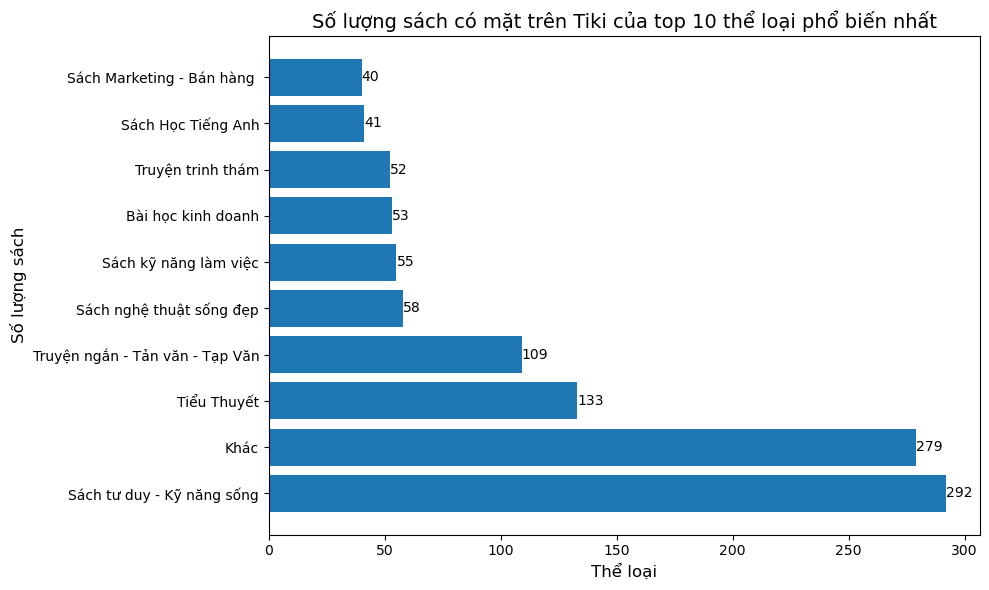

In [6]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.barh(top_categories.index, top_categories['total_books'])

# Hiển thị giá trị số lượng trên thanh
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', va='center', ha='left', color='black')

# Thiết lập tiêu đề và nhãn
plt.title('Số lượng sách có mặt trên Tiki của top 10 thể loại phổ biến nhất', fontsize=14)
plt.xlabel('Thể loại', fontsize=12)
plt.ylabel('Số lượng sách', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét**:
- Biểu đồ thể hiện số lượng sách của top 10 thể loại có nhiều tựa sách nhất. Tuy nhiên, các thể loại như `sách Marketing - Bán hàng`, `Sách Học Tiếng Anh`, `Truyện trinh thám`, `Bài học kinh doanh`, `Sách kỹ năng làm việc`, `Sách nghệ thuật sống đẹp` chỉ có từ 40 - 60 đầu sách, điều này cho thấy với bộ dữ liệu này thì vẫn chưa có quá nhiều đầu sách và cũng chứng tỏ ưu thế áp đảo của các thể loại top đầu. Những thể loại này có số lượng ít do hướng đến nhóm đối tượng cụ thể, không phổ biến đại trà với mọi lứa tuổi.
- Các thể loại cũng có số lượng tựa sách cao như `Truyện ngắn - Tản văn - Tạp Văn`, `Tiểu Thuyết` với 109 và 133 đầu sách. Đây cũng là thể loại được nhiều người ưa chuộng và nhiều tác giả sáng tác để phục vụ nhu cầu của các độc giả yêu thích thể loại tự sự này.
- Thể loại áp đảo nhất là `Sách tư duy - Kỹ năng sống` với 292 tựa sách. Đây là thể loại phổ biến được rất nhiều độc giả săn đón với nhu cầu ở mọi lứa tuổi và phản ánh sự gia tăng quan tâm của độc giả về phát triển cá nhân, tư duy tích cực và kỹ năng mềm. Các nhà xuất bản và tác giả cũng đáp ứng nhu cầu này bằng cách liên tục ra mắt các tựa sách mới và Tiki cũng liên tục nhập những tựa sách theo thể loại này về.
- Thể loại `Khác` đứng thứ hai với 279 tựa sách, đây thường là một danh mục tổng hợp, bao gồm các thể loại nhỏ hoặc ít phổ biến, vì vậy, nó cho thấy sự đa dạng trong danh mục sách. 

### Bước 2: Tìm hiểu doanh thu của các thể loại. <a id="buoc2"></a>

In [7]:
# Tính doanh thu cho từng dòng
df['revenue'] = df['quantity'] * df['current_price']

# Nhóm dữ liệu theo thể loại, tính tổng doanh thu và sắp xếp theo thứ tự giảm dần
category_revenue = df.groupby('category').agg(
    total_revenue=('revenue', 'sum')
).sort_values(by='total_revenue', ascending=False)

print(category_revenue)

                            total_revenue
category                                 
Sách tư duy - Kỹ năng sống   100556454114
Sách nghệ thuật sống đẹp      85272067955
Sách tài chính, tiền tệ       44127774900
Tiểu Thuyết                   30939713157
Khác                          30292751619
...                                   ...
Sách tham khảo cấp I             42959000
Lập Trình                        25745000
Sách tham khảo cấp III           23324250
Sách Học Tiếng Nhật              19613950
Âm Nhạc - Điện Ảnh               15561171

[75 rows x 1 columns]


Doanh thu của các thể loại có sự chênh lệch đáng kể giữa nhóm thể loại có doanh thu nhiều nhất và ít nhất. Nhưng ta dễ dàng nhận thấy các thể loại phổ biến nhất cũng có lượng doanh thu nhiều đáng kể. Như vậy, Tiki đã có sự phân bổ các đầu sách hợp lý, đầu tư đúng thể loại được nhiều độc giả hưởng ứng.

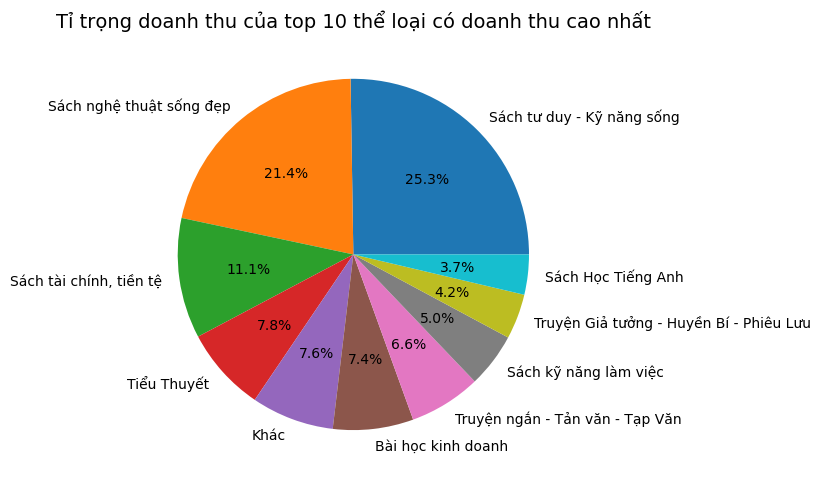

In [8]:
# Lấy top 10 thể loại có doanh thu cao nhất
top_revenue = category_revenue.head(10)

# Vẽ biểu đồ
plt.figure(figsize=(8, 8))
plt.pie(top_revenue['total_revenue'], labels=top_revenue.index, 
        autopct='%1.1f%%', colors=plt.cm.tab10.colors)

# Thiết lập tiêu đề
plt.title('Tỉ trọng doanh thu của top 10 thể loại có doanh thu cao nhất', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét**:
- Dẫn đầu là `Sách tư duy - Kỹ năng sống` với 25.3%, chiếm gần 1/4 doanh thu của top 10 doanh thu cao nhất, chứng tỏ ưu thế vượt trội của thể loại này, không chỉ có nhiều tựa sách mà doanh thu thể loại này mang lại cũng rất cao. Điều này cho thấy đây là thể loại có sức hút lớn nhất đối với người tiêu dùng, đồng thời có thể mang lại doanh thu vượt trội so với các thể loại khác.
- Thể loại `Sách nghệ thuật sống đẹp` bất ngờ đứng ở vị trí thứ 2 với 21.4%, chiếm gần 1/5 doanh thu của top 10 doanh thu cao nhất, dù có số lượng tựa sách hạn chế. Điều này cho thấy thể loại này có sự vượt bậc về số lượng bán ra hoặc giá của các đầu sách. Có lẽ vì nhận được sự quan tâm mạnh mẽ của độc giả đến nội dung truyền cảm hứng và sống tích cực.
- `Sách tài chính, tiền tệ` chiếm tỷ trọng cao thứ 3 dù số lượng sách còn hạn chế (không xuất hiện trong top phổ biến) chứng tỏ thể loại này đầu tư chất lượng hơn số lượng và đây là một thể loại có một lượng fan đông đảo quan tâm đến kinh tế, quản lý tài chính cá nhân và đầu tư.
- Thể loại `Khác` có số lượng các đầu sách rất cao nhưng tỷ trọng doanh thu lại hạn chế có thể là do giá thành rẻ hoặc không được nhiều độc giả quan tâm.
- Các thể loại khác như `Tiểu thuyết` (7.8%), `Bài học kinh doanh` (7.4%), `Truyện ngắn - Tản văn - Tạp Văn` (6.6%) và `Sách kỹ năng làm việc` (5.0%) đóng góp mức doanh thu trung bình.
- Một số thể loại có tỉ trọng thấp hơn như `Sách Học Tiếng Anh` (3.7%) và `Truyện Giả tưởng - Huyền bí - Phiêu lưu` (4.2%) cho thấy sự cạnh tranh hoặc nhu cầu thị trường cho các thể loại này không cao bằng các thể loại trên.
- Nhìn chung, trong 10 thể loại có doanh thu cao nhất thì có đến 8 thể loại nằm trong top phổ biến, chứng tỏ Tiki đã có chiến lược đầu tư nhiều vào các thể loại tạo ra doanh thu tốt.

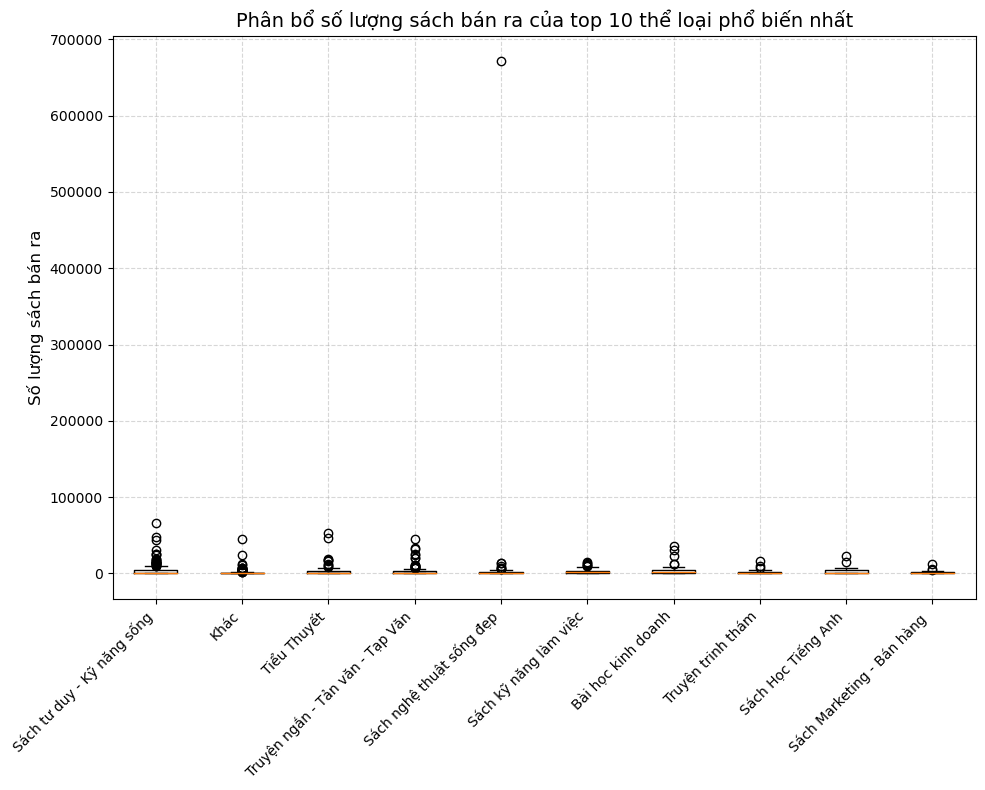

In [9]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
plt.boxplot([top_categories_data[top_categories_data['category'] == category]['quantity'] for category in top_categories.index],
            labels=top_categories.index)

# Thiết lập tiêu đề và nhãn
plt.title('Phân bổ số lượng sách bán ra của top 10 thể loại phổ biến nhất', fontsize=14)
plt.ylabel('Số lượng sách bán ra', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Nhận xét**:

Từ biểu đồ, ta thấy ở thể loại `Sách nghệ thuật sống đẹp` xuất hiện 1 outlier có số lượng bán ra vượt trội hơn hẳn tất cả các tựa sách khác và gấn hơn 50 lần các tựa sách sách trong cùng thể loại.

In [10]:
# Lọc dữ liệu cho thể loại "Sách nghệ thuật sống đẹp"
category_name = 'Sách nghệ thuật sống đẹp'
category_books = df[df['category'] == category_name]

# Sắp xếp theo số lượng bán ra giảm dần
sorted_books = category_books[['title', 'quantity']].sort_values(by='quantity', ascending=False)

print(sorted_books)

                                                  title  quantity
121                          OSHO - Yêu - Being In Love    671121
107                              Chuyện Đi Làm Hết Lòng     13731
116                          Không Sợ Chậm Chỉ Sợ Dừng      13655
177                                 Đúng Việc (Tái Bản)     10038
51    Nói Chuyện Là Bản Năng, Giữ Miệng Là Tu Dưỡng,...      7744
105                     Đắc Nhân Tâm (Bìa Mềm)(Tái Bản)      6660
909                           Ai Sẽ Khóc Khi Bạn Lìa Xa      6400
1548            Quẳng Gánh Lo Đi Và Vui Sống (Bìa Cứng)      5842
383               Bí Mật Của May Mắn (Khổ Nhỏ)(Tái Bản)      5154
962   Ho’Oponopono: Sống Như Người Hawaii – Chấp Nhậ...      4663
1153  Keanu Reeves - Ma Trận Cuộc Đời (Bí Ẩn Đằng Sa...      4519
730   Bí Mật Của May Mắn - Cuốn Sách Đi Tìm Sự May M...      3824
110   Trong Cái Không Có  Gì Không ? (Thiền Sư Thích...      3450
130                                           Dòng Chảy      3128
868       

Vì vậy, để đánh giá các giá trị thống kê của các thể loại, ta loại bỏ các outliers khi vẽ boxplot để dễ dàng quan sát.

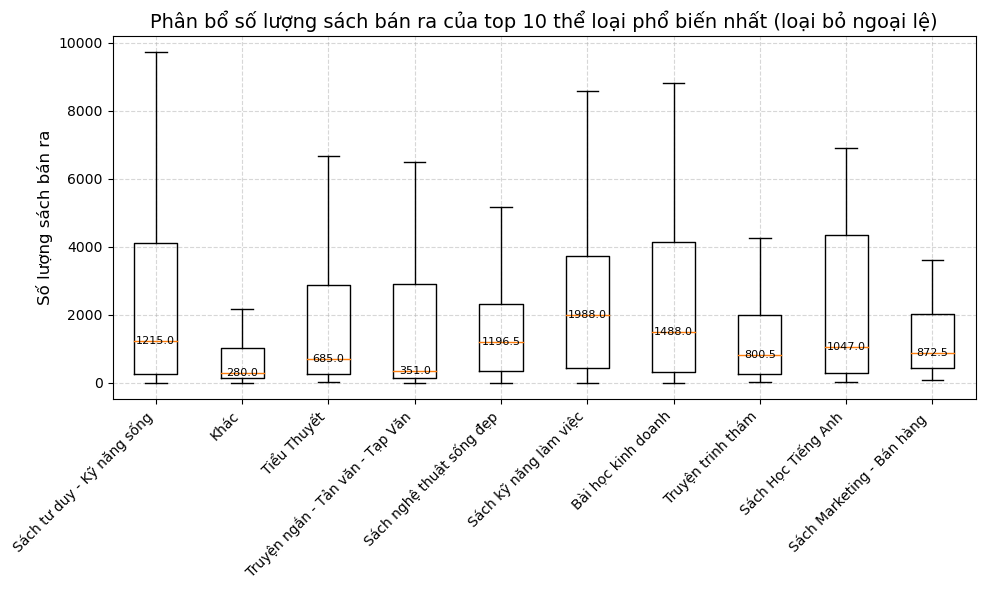

In [11]:
# Tạo data với mỗi `category` là một list các số lượng bán ra
data = [top_categories_data[top_categories_data['category'] == category]['quantity'] for category in top_categories.index]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
box = plt.boxplot(data, labels=top_categories.index, showfliers=False)

# Thêm median vào boxplot
medians = [np.median(d) for d in data]
for i, median in enumerate(medians):
    plt.text(i + 1, median, f'{median:.1f}', ha='center', va='center', fontsize=8, color='black')

# Thiết lập tiêu đề và nhãn
plt.title('Phân bổ số lượng sách bán ra của top 10 thể loại phổ biến nhất (loại bỏ ngoại lệ)', fontsize=14)
plt.ylabel('Số lượng sách bán ra', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Nhận xét**:
- Đầu tiên, ta nhận thấy tất cả các boxplot đều có phần trên median lớn hơn nhiều so với phần dưới, chứng tỏ số lượng bán ra có lượng lớn nhiều hơn hẳn các giá trị nhỏ. Hầu hết các boxplot đều có hộp rộng, cho thấy sự chênh lệch và không đồng đều giữa các tựa sách trong cùng một thể loại, điều này có thể lý giải do nhiều yếu tố khác chứ không chỉ là do thể loại, ví dụ như tác giả, nhà xuất bản,...
- Dẫn đầu về trung vị của số lượng bán ra là thể loại `Sách kỹ năng làm việc` với 1988 sách. Chứng tỏ lượng fan ổn định và đông đảo của thể loại này.
- Tiếp đến là `Bài học kinh doanh` với 1488 sách bán ra, điều này cho thấy thể loại sách này có sức hút với độc giả quan tâm lĩnh vực kinh doanh và sẵn sàng săn đón các đầu sách mới. Phạm vi rộng, cho thấy đây là thể loại được ưa chuộng nhưng phân bố không đồng đều.
- Các đầu sách cũng có số lượng bán ra khá cao là `Sách tư duy - Kỹ năng sống`, `Sách nghệ thuật sống đẹp`, `Sách Học Tiếng Anh`, đều có số lượng bán ra ở mức trung bình.
- Các thể loại như `Truyện ngắn - Tản văn - Tạp văn` có đối tượng độc giả cụ thể làm giới hạn doanh số so với các thể loại phổ biến như `Sách Tư duy - Kỹ năng sống`.
- Thể loại `Khác` trung vị thấp nhất với 280 sách, phản ánh nhóm này tuy nhiều đầu sách nhưng số lượng bán ra không được cao, doanh thu mang lại không nhiều. Hộp nhỏ cho thấy sự tập trung cao quanh trung vị, tức là các sách trong nhóm này có số lượng bán khá đồng đều và thấp.

### Bước 3: Tìm hiểu về mối liên hệ giữa mức giảm giá với số lượng bán ra của từng thể loại. <a id="buoc3"></a>

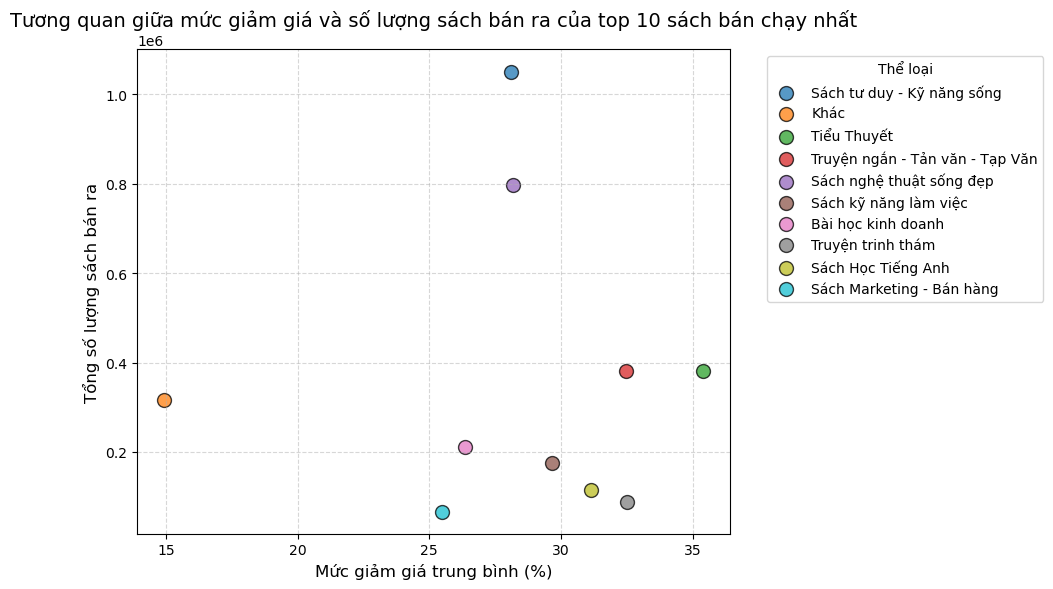

In [12]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
for i, (category, row) in enumerate(top_categories.iterrows()):
    plt.scatter(row['avg_discount'], row['total_quantity'], color=plt.cm.tab10(range(len(top_categories)))[i],
                label=category, s=100, edgecolor='black', alpha=0.75)

# Thêm chú thích
plt.legend(title='Thể loại', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Thiết lập tiêu đề và nhãn
plt.title('Tương quan giữa mức giảm giá và số lượng sách bán ra của top 10 sách bán chạy nhất', fontsize=14)
plt.xlabel('Mức giảm giá trung bình (%)', fontsize=12)
plt.ylabel('Tổng số lượng sách bán ra', fontsize=12)

# Hiển thị biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Nhận xét**:
- Nhìn chung, ở top 10 thể loại bán chạy nhất mức giảm giá dao động quanh 25 đến 35%, cho thấy ở mức giảm giá cao thì số lượng sách cũng bán chạy hơn ở các thể loại.
- Số lượng bán ra vượt trội ở thể loại `Sách tư duy - Kỹ năng sống` dù mức giảm giá chỉ ở mức trung bình thấp hơn so với nhiều thể loại khác, cho thấy thể loại này có xu hướng áp đảo, có sự hấp dẫn nội tại của nội dung sách hoặc nhu cầu cao từ người đọc mà không phải chỉ do mức giá quá rẻ.
- Thể loại `Sách nghệ thuật sống đẹp` cũng có số lượng bán ra vượt trội ở mức giảm giá trung bình, tuy nhiên, thể loại này có một tác phẩm có số lượng bán ra ngoại lệ vượt bậc như đã phân tích ở trên, vì vậy, không thể đánh giá quá rõ ràng về thể loại này.
- Ở thể loại `Khác` ta thấy có mức giảm giá thấp hơn hẳn những thể loại khác nhưng vẫn có số lượng bán ra ở mức ổn, điều này cho thấy các tựa sách ở thể loại `Khác` có người mua mà họ không quá quan trọng mức giá mà quan tâm nhiều vào chất lượng khi mua nó.
- Như vậy, mức giảm giá chỉ là một trong nhiều yếu tố ảnh hưởng đến doanh số sách. Nội dung, giá trị của sách và nhu cầu từ độc giả đóng vai trò quan trọng hơn. `Sách tư duy - Kỹ năng sống` nổi bật trong việc đáp ứng nhu cầu thị trường và dẫn đầu về doanh số dù mức giảm giá không cao.

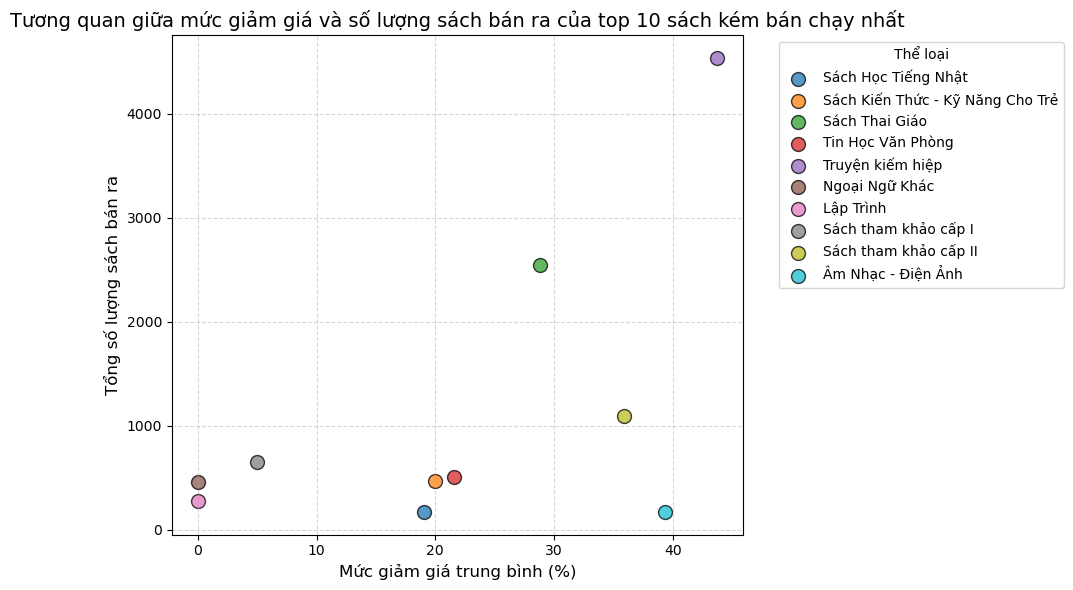

In [13]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
for i, (category, row) in enumerate(bottom_categories.iterrows()):
    plt.scatter(row['avg_discount'], row['total_quantity'], color=plt.cm.tab10(range(len(bottom_categories)))[i], 
                label=category, s=100, edgecolor='black', alpha=0.75)

# Thêm chú thích
plt.legend(title='Thể loại', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Thiết lập tiêu đề và nhãn
plt.title('Tương quan giữa mức giảm giá và số lượng sách bán ra của top 10 sách kém bán chạy nhất', fontsize=14)
plt.xlabel('Mức giảm giá trung bình (%)', fontsize=12)
plt.ylabel('Tổng số lượng sách bán ra', fontsize=12)

# Hiển thị biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Nhận xét**:
- Nhìn chung, ta thấy mức giảm giá của các thể loại ít bán chạy cao, phân bổ từ 20 đến 40%, thậm chí có thể loại đến 45% nhưng vẫn có số lượng bán ra khá khiêm tốn dưới 4000 bản cho tất cả các thể loại, cho thấy đây là nhóm sách ít được quan tâm nhất.
- Mức giảm giá tăng thì số lượng bán ra cũng tăng lên đáng kể, cho thấy chính sách ưu đãi có thể giúp các thể loại ít thu hút được lựa chọn nhiều hơn.
- Tuy nhiên, mức giảm giá không phải yếu tố quan trọng quyết định doanh số đối với nhóm sách kém bán chạy vì vẫn chưa có sự bức phá về số lượng bán ra dù đã giảm giá rất nhiều, chủ yếu mức giảm giá này là để thanh lý các hàng tồn, các tựa sách kém bán chạy. Đặc thù nội dung, độ phổ biến của thể loại và tính ứng dụng thực tế của sách là những yếu tố chính ảnh hưởng đến doanh số.

### Bước 4: Tìm hiểu về mối liên hệ giữa giá hiện tại với số lượng bán ra của từng thể loại. <a id="buoc4"></a>

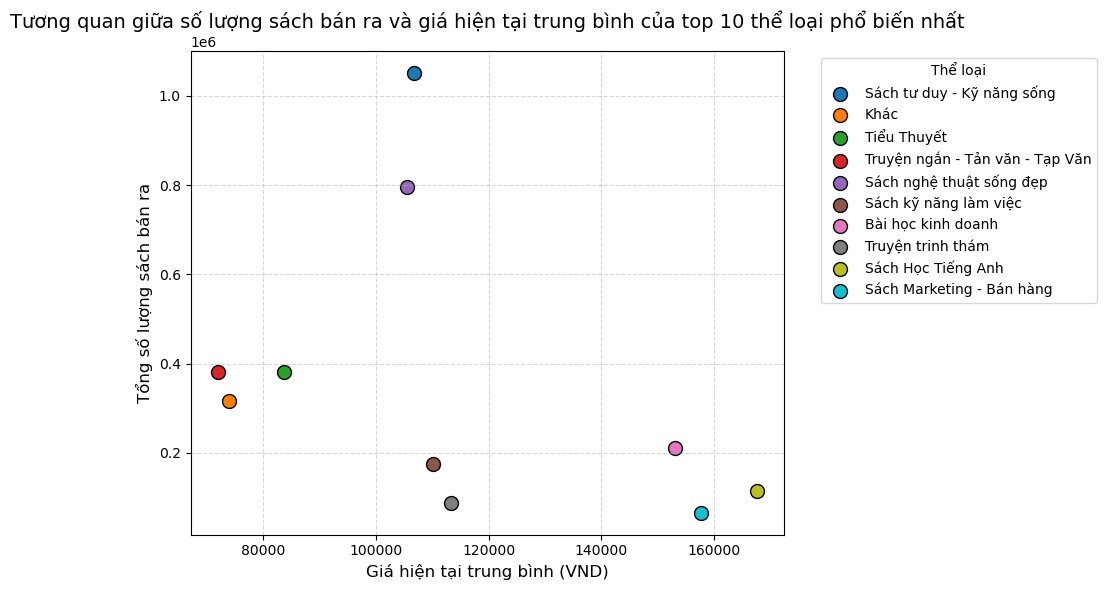

In [14]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
for i, (category, row) in enumerate(top_categories.iterrows()):
    plt.scatter(row['avg_current_price'], row['total_quantity'], color=plt.cm.tab10(range(len(top_categories)))[i], 
                label=category, s=100, edgecolor='black')

# Thêm chú thích
plt.legend(title='Thể loại', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Thiết lập tiêu đề và nhãn
plt.title('Tương quan giữa số lượng sách bán ra và giá hiện tại trung bình của top 10 thể loại phổ biến nhất', fontsize=14)
plt.xlabel('Giá hiện tại trung bình (VND)', fontsize=12)
plt.ylabel('Tổng số lượng sách bán ra', fontsize=12)

# Hiển thị biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Nhận xét**:
- Nhìn chung, mức giá bán ra của các thể loại bán chạy nhất vào khoảng 80000 đến 160000 VNĐ, đây là mức giá khá thấp và phù hợp với túi tiền của nhiều lứa tuổi, nhiều đối tượng.
- Đây cũng là lý do khiến các đầu sách theo các thể loại này bán chạy.

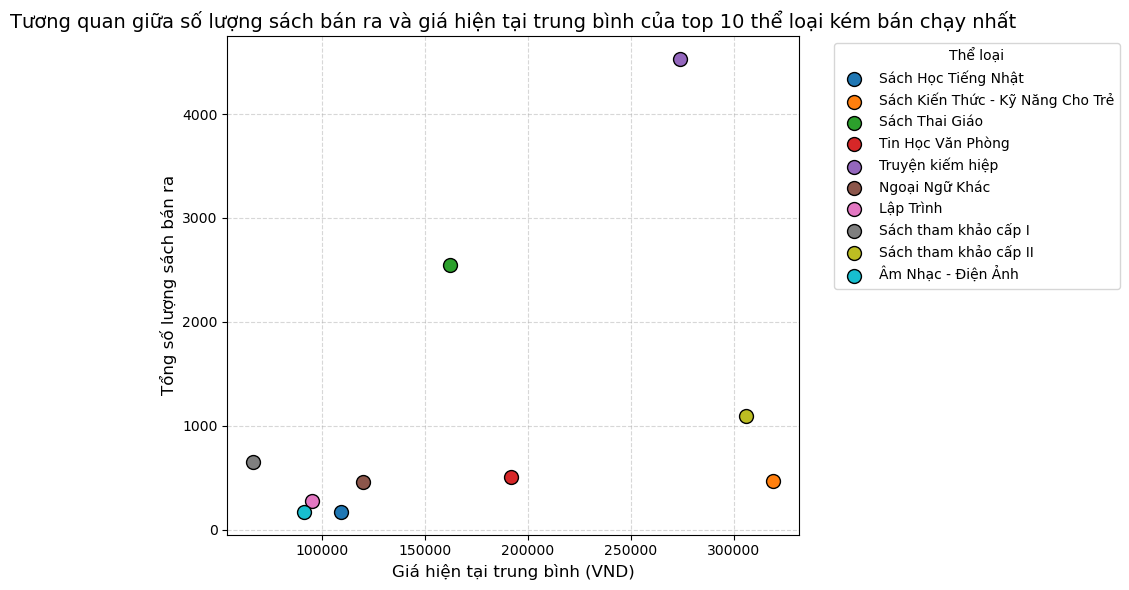

In [15]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
for i, (category, row) in enumerate(bottom_categories.iterrows()):
    plt.scatter(row['avg_current_price'], row['total_quantity'], color=plt.cm.tab10(range(len(bottom_categories)))[i], 
                label=category, s=100, edgecolor='black')

# Thêm chú thích
plt.legend(title='Thể loại', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Thiết lập tiêu đề và nhãn
plt.title('Tương quan giữa số lượng sách bán ra và giá hiện tại trung bình của top 10 thể loại kém bán chạy nhất', fontsize=14)
plt.xlabel('Giá hiện tại trung bình (VND)', fontsize=12)
plt.ylabel('Tổng số lượng sách bán ra', fontsize=12)

# Hiển thị biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Nhận xét**:
- Nhìn chung, mức giá bán ra của các thể loại kém bán chạy khá cao, có nhiều tựa sách trên 250000 VNĐ.
- Chủ yếu các thể loại này nghiên về một nhóm đối tượng cụ thể, có tính chuyên môn và chất lượng đảm bảo, nên số lượng bán ra ít và có mức giá khá cao nhưng vẫn đảm bảo một số lượng độc giả nhất định. Ví dụ như sách tham khảo cấp II có mức giá hơn 300000 nhưng vẫn bán được hơn 1000 bản vì các độc giả có nhu cầu nhất định do cần thiết trong việc học tập,...

### Bước 5: Tìm hiểu về mối liên hệ giữa điểm đánh giá, lượt đánh giá với số lượng bán ra của từng thể loại. <a id="buoc5"></a>

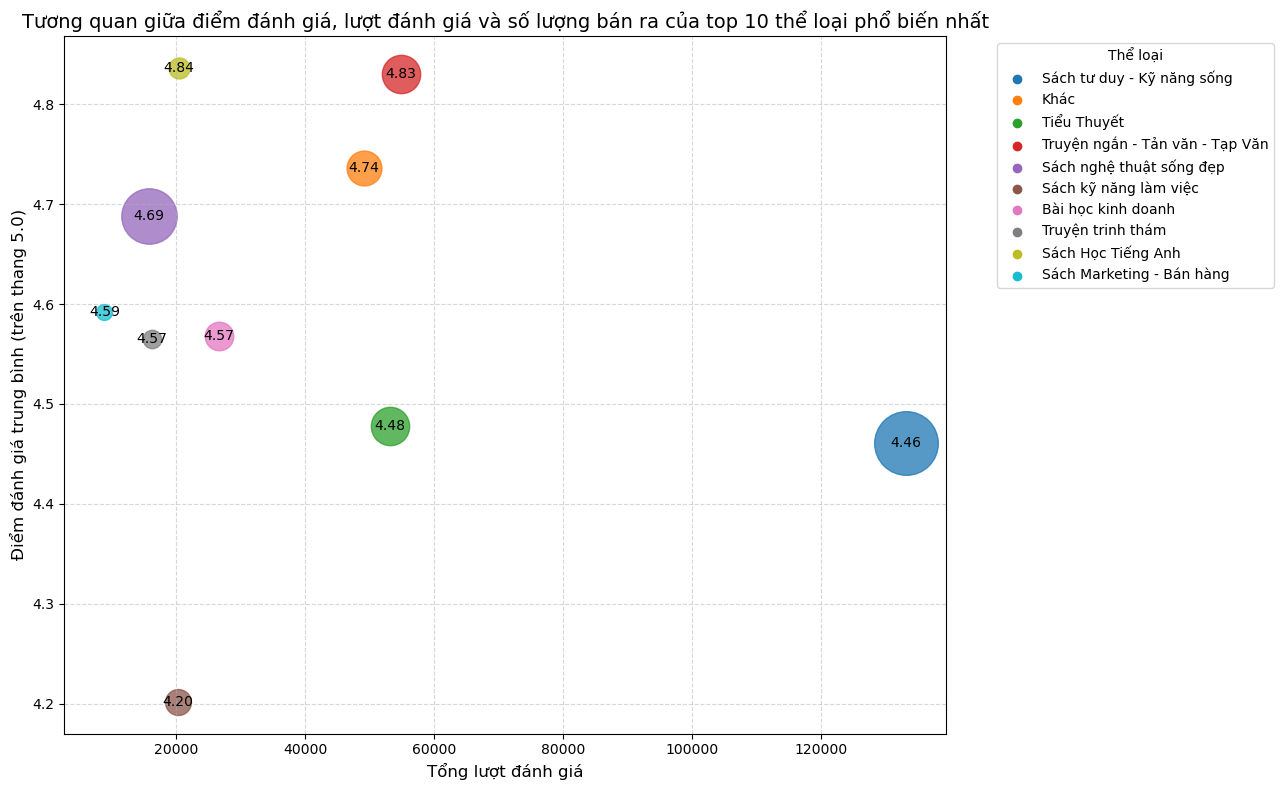

In [16]:
# Vẽ biểu đồ
plt.figure(figsize=(13, 8))
for i, (category, row) in enumerate(top_categories.iterrows()):
    plt.scatter(
        row['total_reviews'],  # Trục X: Tổng lượt đánh giá
        row['avg_rating'],  # Trục Y: Điểm đánh giá trung bình
        s=row['total_quantity'] / 500,  # Kích thước bong bóng
        color=plt.cm.tab10(range(len(top_categories)))[i], 
        alpha=0.75, label=''  # Không thêm vào chú thích
    )
    # Thêm điểm trung bình vào giữa bong bóng
    plt.text(
        row['total_reviews'], row['avg_rating'],  # Vị trí text
        f"{row['avg_rating']:.2f}",  # Điểm đánh giá trung bình
        ha='center', va='center', fontsize=10, color='black'
    )

# Thêm chú thích
for i, category in enumerate(top_categories.index):
    plt.scatter([], [], color=plt.cm.tab10(range(len(bottom_categories)))[i], label=category)  # Dùng điểm rỗng với màu để tạo chú thích
plt.legend(title='Thể loại', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Thêm tiêu đề và nhãn trục
plt.title('Tương quan giữa điểm đánh giá, lượt đánh giá và số lượng bán ra của top 10 thể loại phổ biến nhất', fontsize=14)
plt.xlabel('Tổng lượt đánh giá', fontsize=12)
plt.ylabel('Điểm đánh giá trung bình (trên thang 5.0)', fontsize=12)

# Hiển thị biểu đồ
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Nhận xét**:
- Nhìn chung, ta thấy phổ điểm trung vị cho các thể loại bán chạy là từ 4.2 đến 4.84 (trên thang 5.0), trong đó các điểm cao trên mức 4.5 khá nhiều, chứng tỏ chất lượng của các tựa sách bán chạy là ở mức ổn định.
- Thể loại `Sách tư duy - Kỹ năng sống` có tổng lượt đánh giá cao nhất hơn 120,000 lượt và điểm trung bình khá cao 4.46. Dù không đạt điểm đánh giá cao nhất, thể loại này rất phổ biến nhờ đáp ứng nhu cầu rộng rãi của độc giả.
- Điểm đánh giá trung bình cao ở `Sách học tiếng Anh` và `Truyện ngắn - Tản văn - Tạp văn` cho thấy chất lượng nội dung tốt, đáp ứng kỳ vọng của độc giả.
- Thể loại `Sách kỹ năng làm việc` có điểm số thấp hơn do nội dung chuyên sâu, đòi hỏi chất lượng cao và nhóm độc giả hạn chế, khó tính.
- Biểu đồ cho thấy mối quan hệ rõ ràng giữa điểm đánh giá trung bình, lượt đánh giá và số lượng bán ra của từng thể loại. Các thể loại có tổng lượt đánh giá cao thường là những sách phục vụ nhu cầu rộng rãi, trong khi điểm đánh giá trung bình phụ thuộc vào chất lượng và sự kỳ vọng của độc giả.

## Kết luận: <a class="anchor" id="ketluan"></a>

- Đầu tư trọng tâm vào nhóm sách phát triển cá nhân: `Sách tư duy - Kỹ năng sống`, `Sách nghệ thuật sống đẹp` là thể loại dẫn đầu về mức độ phổ biến và doanh thu. Đây là phân khúc thu hút nhiều độc giả nhờ tính thực tiễn và giá trị truyền cảm hứng. Tiki nên tiếp tục mở rộng danh mục sách ở thể loại này, hợp tác với các tác giả và nhà xuất bản uy tín để phát hành các tựa sách mới. Đồng thời, tổ chức các sự kiện trực tuyến như hội thảo hoặc chương trình tặng sách để gia tăng nhận diện thương hiệu và thu hút thêm độc giả.
- Khai thác các chương trình khuyến mãi để thúc đẩy doanh số: `Sách Học Tiếng Anh` và `Truyện Giả tưởng - Huyền Bí - Phiêu Lưu`. Tiki có thể tổ chức các chương trình giảm giá định kỳ hoặc tặng kèm quà khi mua sách trong các dịp đặc biệt như mùa tựu trường hoặc lễ hội sách. Hợp tác với các trung tâm tiếng Anh hoặc nền tảng học trực tuyến cũng là một cách hiệu quả để đẩy mạnh doanh số.
- Tận dụng xu hướng để mở rộng nội dung sách phù hợp nhu cầu hiện tại: `Bài học kinh doanh`, `Sách tài chính, tiền tệ`. Theo dõi sát sao các xu hướng xã hội và kinh tế để đưa ra gợi ý xuất bản sách mới. Ví dụ, xu hướng làm việc từ xa, khởi nghiệp, hoặc chăm sóc sức khỏe tinh thần có thể là những chủ đề hấp dẫn độc giả hiện nay.
- Tối ưu hóa chiến lược giá và khuyến mãi: Mặc dù mức giảm giá là một yếu tố quan trọng, nhưng nội dung sách, giá trị thực tiễn, và nhu cầu từ độc giả mới là yếu tố quyết định. Áp dụng mức giảm giá linh hoạt, đặc biệt cho các thể loại có sức cạnh tranh cao. Tuy nhiên, cần kết hợp chiến lược khuyến mãi với việc nâng cao chất lượng và quảng bá nội dung sách để duy trì giá trị lâu dài.
- Phát triển nội dung dựa trên đánh giá và phản hồi độc giả: Các thể loại có tổng lượt đánh giá cao thường phục vụ nhu cầu rộng rãi, trong khi điểm đánh giá trung bình phản ánh mức độ hài lòng của độc giả. Tiki nên ưu tiên các thể loại nhận được nhiều phản hồi tích cực, đồng thời phân tích kỹ các đánh giá thấp để cải thiện nội dung và trải nghiệm người dùng. Tạo tính năng đề xuất sách dựa trên đánh giá cá nhân hóa cũng là một cách tăng doanh số.